Naman Raiyani

60009220057

D2-1

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

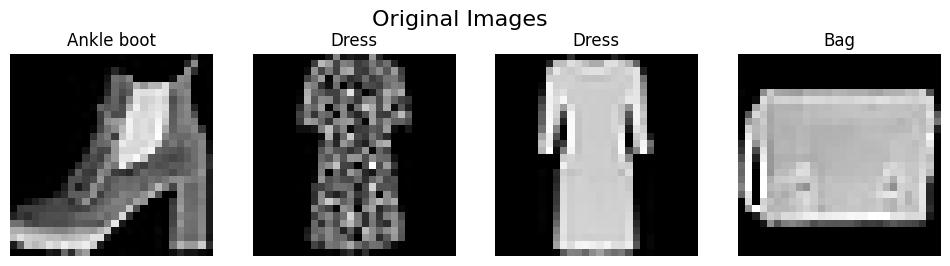

In [ ]:
import random
train_images = train_images.reshape((60000, 28, 28, 1))

labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}
original_images = []
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

true_lables = []

for ax in axes:
    random_index = random.randint(0, len(train_images) - 1)
    original_images.append(train_images[random_index].reshape(28, 28))
    ax.imshow(original_images[-1], cmap='gray')
    ax.set_title(f'{labels[train_labels[random_index]]}')
    true_lables.append(labels[train_labels[random_index]])
    ax.axis('off')
fig.suptitle('Original Images', fontsize=16)
plt.show()

In [ ]:
import numpy as np
def digital_negative(img):
  neg = []
  for i in range(len(img)):
    temp = []
    for j in range(len(img)):
      s = 256 - 1 - img[i][j]
      temp.append(s)
    neg.append(temp)
  return np.array(neg)

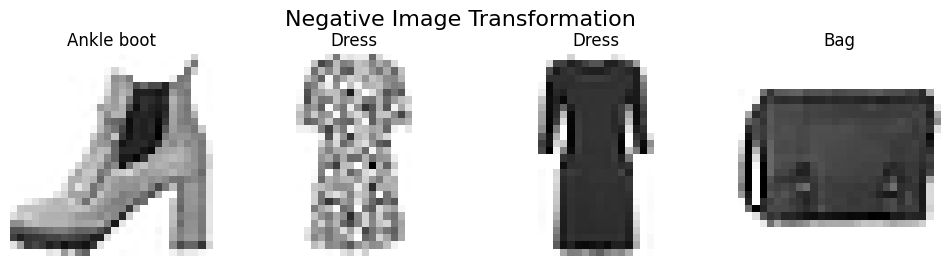

In [ ]:
negative_images = []
for og_img in original_images:
  negative_image = digital_negative(og_img)
  negative_images.append(negative_image)

fig, axes = plt.subplots(1, 4, figsize=(12, 3))
i = 0
for ax in axes:
    ax.imshow(negative_images[i], cmap='gray')
    ax.set_title(f'{true_lables[i]}')
    ax.axis('off')
    i += 1
fig.suptitle('Negative Image Transformation', fontsize=16)
plt.show()

In [ ]:
def thresholding(img, threshold = 127):
  new_img = img.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i][j] >= threshold:
       new_img[i][j] = 255
      else:
        new_img[i][j] = 0
  return(new_img)

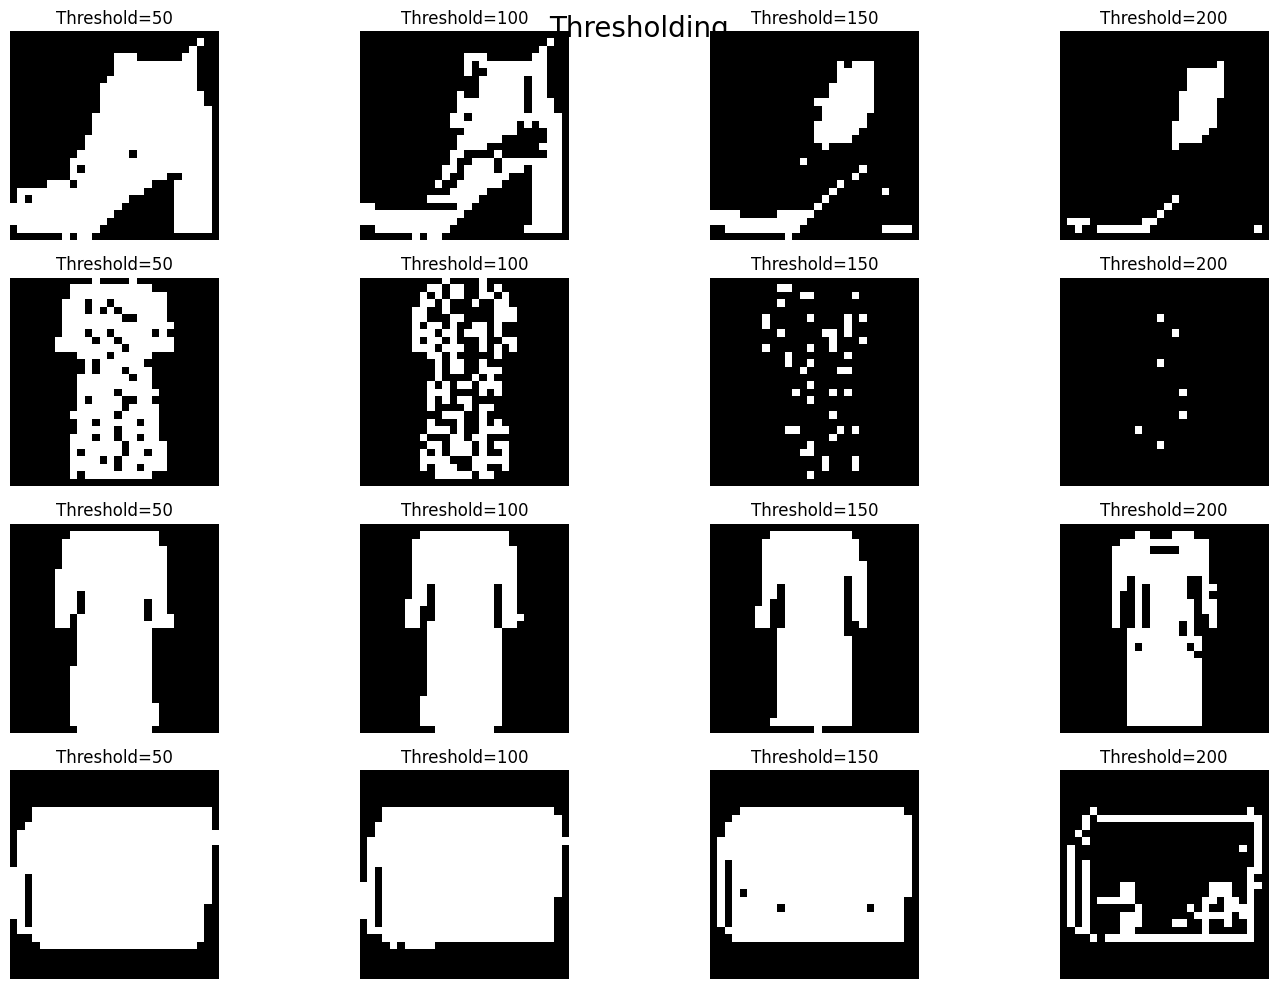

In [ ]:
threshold_values = [50, 100, 150, 200]

thresholding_images = []

for og_img in original_images:
    for threshold in threshold_values:
        threshold_image = thresholding(og_img, threshold)
        thresholding_images.append(threshold_image)

fig, axes = plt.subplots(len(original_images), len(threshold_values), figsize=(15, 10))

for i, og_img in enumerate(original_images):
    for j, threshold in enumerate(threshold_values):
        ax = axes[i, j]
        ax.imshow(thresholding_images[i * len(threshold_values) + j], cmap='gray')
        ax.set_title(f'Threshold={threshold}')
        ax.axis('off')

plt.tight_layout()
fig.suptitle('Thresholding', fontsize=20)
plt.show()

In [ ]:
def gls_without_bg(img,a,b):
  neg=[]
  for i in range(len(img)):
    temp=[]
    for j in range(len(img)):
      if (img[i][j]>=a and img[i][j]<=b):
        s=255
      else:
        s=0
      temp.append(s)
    neg.append(temp)
  return np.array(neg)

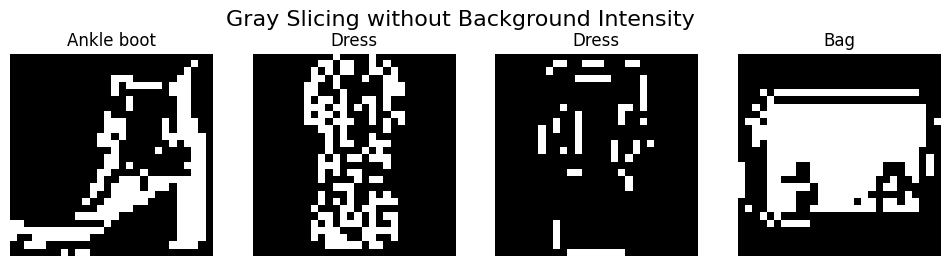

In [ ]:
grays_without_background = []
for og_img in original_images:
  gray = gls_without_bg(og_img, 100 ,200)
  grays_without_background.append(gray)

fig, axes = plt.subplots(1, 4, figsize=(12, 3))
i = 0
for ax in axes:
    ax.imshow(grays_without_background[i], cmap='gray')
    ax.set_title(f'{true_lables[i]}')
    ax.axis('off')
    i += 1
fig.suptitle('Gray Slicing without Background Intensity', fontsize=16)
plt.show()

In [ ]:
def gls_with_bg(img,a,b):
  neg=[]
  for i in range(len(img)):
    temp=[]
    for j in range(len(img)):
      if (img[i][j]>=a and img[i][j]<=b):
       s= img[i][j]
      else:
       s=0
      temp.append(s)
    neg.append(temp)
  return np.array(neg)

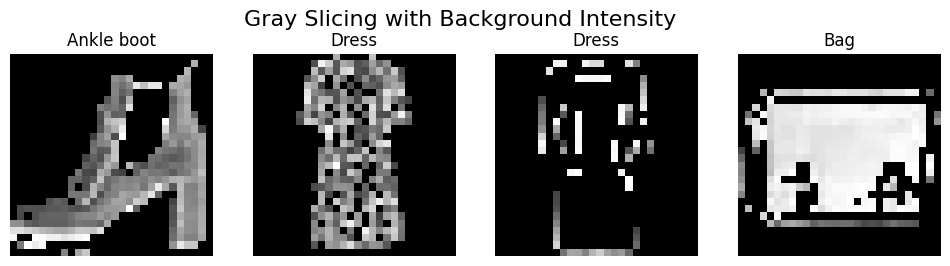

In [ ]:
grays_with_background = []
for og_img in original_images:
  gray = gls_with_bg(og_img, 50 ,200)
  grays_with_background.append(gray)

fig, axes = plt.subplots(1, 4, figsize=(12, 3))
i = 0
for ax in axes:
    ax.imshow(grays_with_background[i], cmap='gray')
    ax.set_title(f'{true_lables[i]}')
    ax.axis('off')
    i += 1
fig.suptitle('Gray Slicing with Background Intensity', fontsize=16)
plt.show()